In [97]:
import cuadraturas
import Integrals
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from funciones import GetNewton

## Completados:

6, 10, 7, 17, 18

## Revisar:

19

## Completar

3,5,19

----

Problemas parcial 2

Ejercicios: Raíces de polinomios 5

Ejercicios: Integración: 1,3,6,7,10,17,18,19

Teoricos:
* 1
* 3

Computacionales:
* 10 (Sympy)
* 17 (Gauss-Laguerre)
* 18 (Gauss Hermite)
* 19 (Gauss Legendre)

# **Raices de polinomios**

### **Ejercicio 5**

In [215]:
x = sym.Symbol("x", real=True)
n = sym.Symbol("n", real=True)

In [169]:
def funcion(x,n):
    return sym.exp(-x)*x**n

In [170]:
def df(x,n):
    '''derivada n-esima de exp(-x)x^n'''
    return sym.diff(funcion(x,n),x,n)

In [214]:
def polyLaguerre(x,n):
    return (sym.exp(x)/np.math.factorial(n))*df(x,n)

In [184]:
def GetAllRootsGlag(n,liminf,limsup):
    
    tolerancia = 10
    xn = np.linspace(liminf,limsup,50)
    #puntos_ini= [0,0.5,1,2,3,4,6,7,9,12,14.5,16,18,21,26,29,35,41,44,50]
    #xn = np.array(puntos_ini)
    
    poly = polyLaguerre(x,n)
    df_poly = sym.diff(poly,x,1)
    
    poly = sym.lambdify(x,poly,'numpy')
    df_poly = sym.lambdify(x,df_poly,'numpy')
    
    Roots = np.array([])
    
    for i in xn:
        
        root = GetNewton(poly,df_poly,i)
        #print(type(root))
        if  type(root)!=bool:
            croot = np.round(root, tolerancia)
            if croot not in Roots:
                Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return np.unique(Roots)

In [186]:
roots_poly20 = np.array([])
for i in range(0,60,5):
    roots_poly20 = np.append(roots_poly20,GetAllRootsGlag(20,i,i+5))

In [211]:
roots_poly20

array([0.07053989, 0.37212682, 0.9165821 , 1.70730653, 2.74919926,
       0.07053989, 0.07053989, 4.04892531, 0.07053989, 1.70730653,
       0.07053989])

Graficamos el polinomio por intervalos para ver mejor dónde están las raices

In [217]:
poly = polyLaguerre(x,20)
poly = sym.lambdify(x,poly,'numpy')

Text(0.5, 0.98, 'Polinomio legendre grado 20')

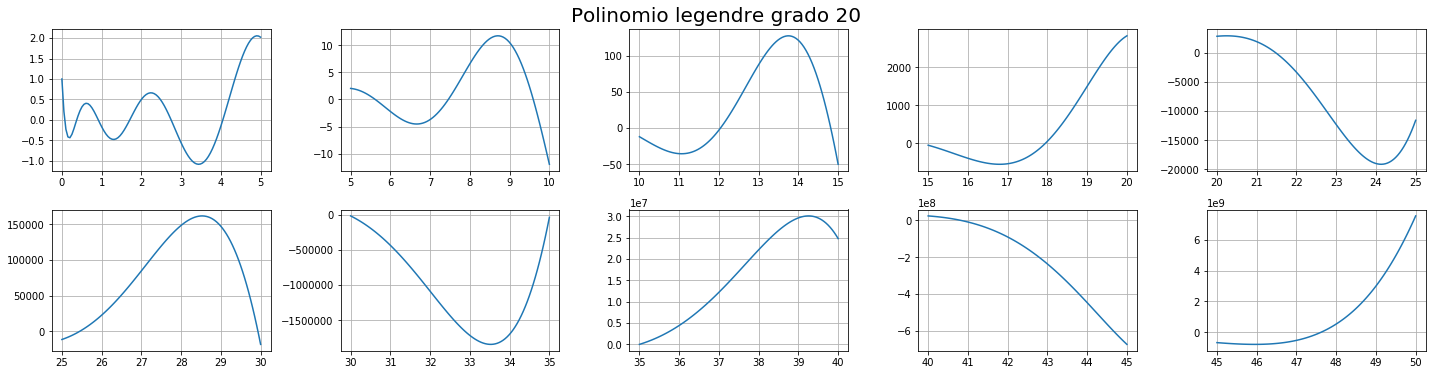

In [219]:
fig, axs = plt.subplots(2,5,figsize = (20,5))
temp = [i for i in range(0,60,5)]
indice = 0
for i in range(2):
    for j in range(5):
        x = np.linspace(temp[indice],temp[indice]+5,100)
        y = poly(x)
        axs[i,j].plot(x,y)
        axs[i,j].grid()
        indice+=1
plt.tight_layout()
fig.suptitle('Polinomio legendre grado 20',verticalalignment='bottom', fontsize=20)

# **Integracion**

### **Ejercicio 1**

$I = \int_a^b f(x)dx \cong \int_a^b p_1(x)dx = \frac{b-a}{2}(f(a)+f(b))$

Dem: 

Sabemos que $f(x)\cong p_1(x) = \frac{x-b}{a-b}f(a) + \frac{x-a}{b-a}f(b), \forall x\in [a,b]$ (inteporlación de legendre con soporte de dos elementos).

Entonces 

\begin{equation}
\begin{split}
\int_a^b f(x)dx \cong \int_a^b p_1(x)dx &= \frac{f(a)}{a-b}\big(\frac{b^2}{2}-\frac{a^2}{2}-b^2+ab\big) +\frac{f(b)}{b-a}\big(\frac{b^2}{2}-\frac{a^2}{2}-ab+a^2\big) \\
 & = \frac{f(a)}{b-a}\big(ab-\frac{b^2}{2}-\frac{a^2}{2}\big) + \frac{f(b)}{b-a}\big(\frac{b^2}{2}+\frac{a^2}{2}-ab\big) \\
 &=\frac{f(a)}{b-a}\big(\frac{1}{2}(b-a)^2\big)+\frac{f(b)}{b-a}\big(\frac{1}{2}(b-a)^2\big) \\
 &= \frac{(b-a)^2}{2(b-a)}\big(f(a)+f(b)\big) \\
 &= \frac{b-a}{2}\big(f(a)+f(b)\big)
\end{split}
\end{equation}

### **Ejercicio 3**

Esta en el pdf "problema_3_integracion" en esta misma carpeta

### **Ejercicio 6**

In [2]:
import Integrals

In [3]:
def funcion(x):
    R = 0.5
    a = 0.01
    numerador = np.sqrt((a**2)-(x**2))
    denominador = R+x
    return numerador/denominador

In [4]:
N = 100
a = 0.01
x = np.linspace(-0.01,0.01,N)
y = funcion(x)
f = funcion

In [5]:
Simpson = Integrals.Simpson(x,f)

In [6]:
anvalue = np.pi*(0.5-np.sqrt((0.5**2)-(a**2)))
print(f"Valor analitico de la integral: {anvalue}")

Valor analitico de la integral: 0.0003141906875702543


In [7]:
error = np.abs(Simpson.Simple()-anvalue)
print("Simpson 1/3:")
print(f"Integral con Simpson (1/3): {Simpson.Simple()}")
print(f"Error con Simpson (1/3): {error}")

Simpson 1/3:
Integral con Simpson (1/3): 5.387205387205376e-06
Error con Simpson (1/3): 0.00030880348218304893


In [72]:
Simpson.GetSimpleError()

C:\Users\maxal\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


4.087771343295025e-09

In [8]:
#Integral usando Trapecio
Trapecio = Integrals.Integrator(x,f)
error = np.abs(Trapecio.GetIntegral()-anvalue)
print(f"Trapecio:\nIntegral: {Trapecio.GetIntegral()}")
print(f"Error con Trapecio: {error}")

Trapecio:
Integral: 0.0003139164964308314
Error con Trapecio: 3.3759580442608e-07


### **Punto 7**

Calcular el volumen de una semiesfera de radio R=1

In [9]:
def semiesfera(x,y):
    if x**2+y**2<=1:
        return np.sqrt(x**2+y**2)
    else:
        return 0

In [10]:
#Meshgrid the 5x5
x,y = np.mgrid[-1:1:500j,-1:1:500j]

In [11]:
Areasq = (x[1,1]-x[0,0])*(y[1,1]-y[0,0])

In [12]:
coord_values ={}
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        x_vertex = x[i, j]
        y_vertex = y[i, j]
        value = semiesfera(x_vertex, y_vertex)
        coord_values[(i,j)] = value
        

In [13]:
def mean_at_sq(i,j):
    suma = coord_values[(i,j)] + coord_values[(i+1,j+1)] + coord_values[(i+1,j)] + coord_values[(i,j+1)]
    return suma/4

In [14]:
volume = 0
for i in range(len(x)-1):
    for j in range(len(y)-1):
        volume+=Areasq*mean_at_sq(i,j)

In [33]:
print(f"Volumen aproximado: {volume}")

Volumen aproximado: 2.09328807542419


### **Ejercicio 10**

In [16]:
x = sym.Symbol('x',real=True)
h = sym.Symbol('h', real=True)

Tenemos que $E =\frac{f^{(4)}(\zeta)}{24}\int_0^{3h}(x)(x-h)(x-2h)(x-3h)dx $

In [17]:
def funcion(x,h):
    return x*(x-h)*(x-2*h)*(x-3*h)

Usamos Sympy para calcular $\int_0^{3h}(x)(x-h)(x-2h)(x-3h)dx$

Lo cual es igual a 

In [18]:
sym.integrate(funcion(x,h), (x, 0, 3*h))

-9*h**5/10

Entonces  $E = \frac{f^{(4)}(\zeta)}{24}\int_0^{3h}(x)(x-h)(x-2h)(x-3h)dx = \frac{f^{(4)}(\zeta)}{24}\cdot \frac{-9h^5}{10} = \frac{f^{(4)}(\zeta)}{24}\cdot \frac{-9h^5}{10} = \frac{-3h^5f^{4}(\zeta)}{80}$

### **Ejercicio 17**

**a)**

In [19]:
def funcion(x):
    return (x**3)/(np.exp(x)-1)*np.exp(x)

In [20]:
raices = cuadraturas.GetAllRootsGlag(3)
pesos = cuadraturas.GetWeightsGLag(3)

Aproximacion con el **tercer** polinomio de Laguerre

In [21]:
sum(pesos*funcion(raices)) #valor exacto 6.493939402266828

6.481130171540032

**b)**

In [22]:
exact_value = np.pi**4/15
rel_errores = np.array([])
for n in range(2,11):
    raices = cuadraturas.GetAllRootsGlag(n)
    pesos = cuadraturas.GetWeightsGLag(n)
    aprox = sum(pesos*funcion(raices))
    error = aprox/exact_value
    rel_errores = np.append(rel_errores,error)

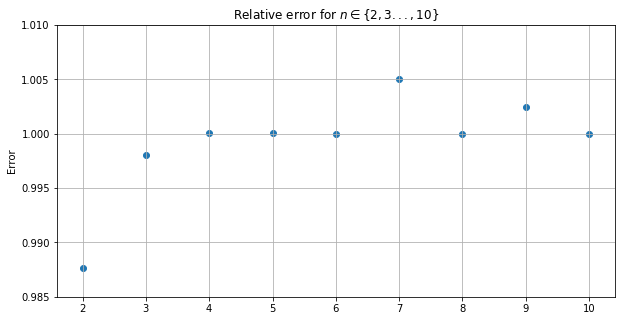

In [23]:
fig, ax = plt.subplots(figsize= (10,5))
x = np.array([i for i in range(2,11)])
ax.scatter(x,rel_errores)
ax.set_title(r"Relative error for $n \in\{2,3...,10\}$")
ax.set_ylabel("Error")
plt.ylim(0.985,1.010)
plt.grid()

### **Ejercicio 18**

a)

Pesos del polinomio de Hermite de grado 20

In [24]:
cuadraturas.GetWeightsGHer(20)

array([2.22939365e-13, 4.39934099e-10, 1.08606937e-07, 7.80255648e-06,
       2.28338636e-04, 3.24377334e-03, 2.48105209e-02, 1.09017206e-01,
       2.86675505e-01, 4.62243670e-01, 4.62243670e-01, 2.86675505e-01,
       1.09017206e-01, 2.48105209e-02, 3.24377334e-03, 2.28338636e-04,
       7.80255648e-06, 1.08606937e-07, 4.39934099e-10, 2.22939365e-13])

Raices del polinomio de Hermite de grado 20

In [25]:
cuadraturas.GetAllRootsGHer(20)

array([-5.38748089, -4.60368245, -3.94476404, -3.34785457, -2.78880606,
       -2.254974  , -1.73853771, -1.23407622, -0.73747373, -0.24534071,
        0.24534071,  0.73747373,  1.23407622,  1.73853771,  2.254974  ,
        2.78880606,  3.34785457,  3.94476404,  4.60368245,  5.38748089])

b)

In [26]:
def funcion(x):
    p = 0.5*(1/np.pi**0.5)*4*x**2
    return p*x**2

In [27]:
roots = cuadraturas.GetAllRootsGHer(5) #raiz de poly hermite grado 5
weights = cuadraturas.GetWeightsGHer(5) #peso de poly hermite grado 5

In [28]:
np.sum(weights*funcion(roots))

1.4999999999999796

### **Ejercicio 19**

a)

In [268]:
def funcion(x,T,banda):
    denominador = np.sqrt(x**2+banda**2)
    numerador = 0.5*np.tanh(denominador*300*(1/(2*T)))
    return numerador/denominador

b)

In [269]:
n = 50
Roots, Weights = np.polynomial.legendre.leggauss(n)

c)

In [270]:
20/1e-4

200000.0

In [271]:
T = np.linspace(1,20,200000)

d)

In [272]:
i = 0
Tc = T[i]
I = np.sum(Weights*funcion(Roots,T[i],0))
while i< len(T) and np.abs(I-1/0.3)>= 1e-4:
    I = np.sum(Weights*funcion(Roots,T[i],0))
    Tc = T[i]
    i+=1

In [275]:
print(f"La temperatura critica es {Tc} K")

La temperatura critica es 12.13358066790334 K
